In [189]:
import pandas as pd
import numpy as np
from numpy import random
from numpy.linalg import inv
import os
import scipy
from scipy import stats
from scipy.stats import skew,kurtosis,binom,poisson,expon,norm,t,chisquare,chi2,chi2_contingency,f
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',None)
from pylab import legend
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import proportions_ztest

from statsmodels.stats.rates import test_poisson, test_poisson_2indep
from statsmodels.stats import rates


In [190]:
os.chdir(r'C:\Coding\6b. Statistics')

In [191]:
df=pd.read_csv('hotel_bookings.csv')

In [192]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [194]:
df.shape

(119390, 32)

In [195]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# 1. Data Cleaning and Preprocessing

In [196]:
df = df.drop(["agent", "company"], axis = 1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [197]:
df.shape

(119390, 30)

In [198]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [199]:
# dropping "Agent"  and "Company" because they dont have ani significant impact on any analysis 

In [200]:
df1=df

In [201]:
df1.children = df1.children.fillna(df1.children.mode())

Filling the missing values in children column with mode value.

In [202]:
df2 = df1.dropna(subset=['country'])

In [203]:
df2.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [204]:
df2['arrival_date_month'] = pd.to_datetime(df2['arrival_date_month'], format='%B').dt.month

C:\Users\RDX\AppData\Local\Temp\ipykernel_3024\2413653413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['arrival_date_month'] = pd.to_datetime(df2['arrival_date_month'], format='%B').dt.month


Type casting month from string to int

In [205]:
df2['arrival_date'] = pd.to_datetime(dict(year=df2['arrival_date_year'], month=df2['arrival_date_month'], day=df2['arrival_date_day_of_month']))
df2['arrival_date'].head()

C:\Users\RDX\AppData\Local\Temp\ipykernel_3024\1387634668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['arrival_date'] = pd.to_datetime(dict(year=df2['arrival_date_year'], month=df2['arrival_date_month'], day=df2['arrival_date_day_of_month']))


0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

Making a new column out of day, month and year i.e., arrival_date

In [206]:
df2['reservation_status_date'] = pd.to_datetime(df2['reservation_status_date'])

C:\Users\RDX\AppData\Local\Temp\ipykernel_3024\2103282634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reservation_status_date'] = pd.to_datetime(df2['reservation_status_date'])


converted reservation_status_date from object to datetime

In [207]:
df2['total_stay'] = df2['stays_in_week_nights'] + df2['stays_in_weekend_nights']

C:\Users\RDX\AppData\Local\Temp\ipykernel_3024\1436206412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_stay'] = df2['stays_in_week_nights'] + df2['stays_in_weekend_nights']


created a new column 'total_stay' by adding stays_in_week_nights and 'stays_in_weekend_nights'


In [208]:
df2['total_guests'] = df2['adults'] + df2['children'] + df2['babies']

C:\Users\RDX\AppData\Local\Temp\ipykernel_3024\3438941138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_guests'] = df2['adults'] + df2['children'] + df2['babies']


calculating total guests by adding adults, children and babies

In [209]:
df2['total_revenue'] = df2['adr'] * df2['total_stay']

C:\Users\RDX\AppData\Local\Temp\ipykernel_3024\553329867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_revenue'] = df2['adr'] * df2['total_stay']


calculating total revenue of each booking

plotting graphs for lead_time ,adr ,total_stay ,total_of_special_requests ,total_guests

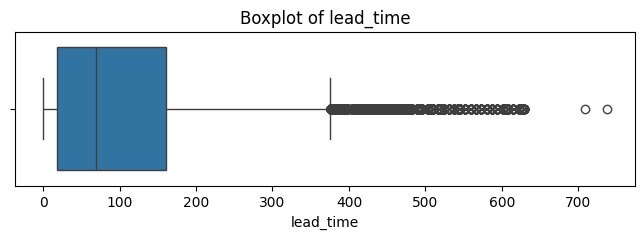

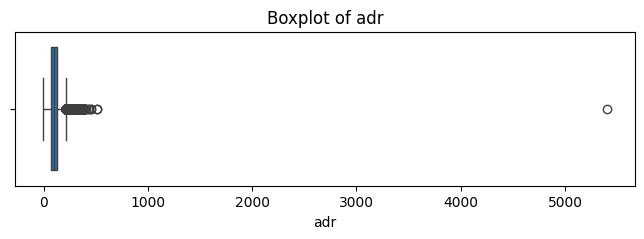

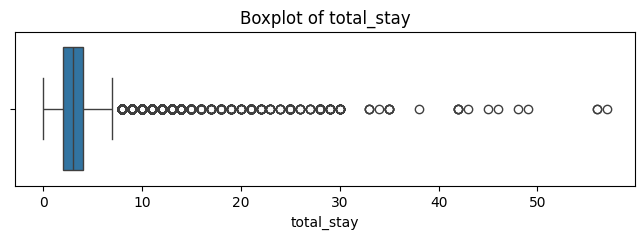

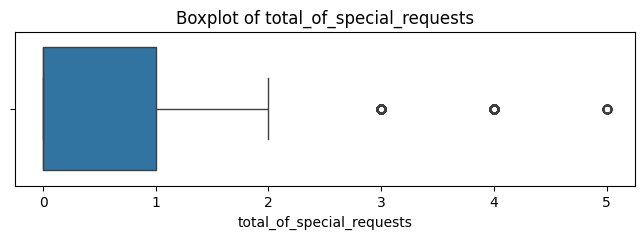

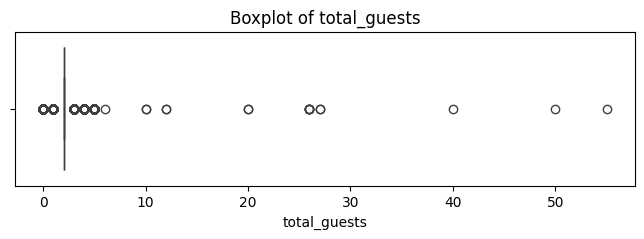

In [210]:
numeric_cols = ['lead_time', 'adr', 'total_stay', 'total_of_special_requests', 'total_guests']

for col in numeric_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df2[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


major data loss will be recorded if outliers are dropped 
which might affect the end results 
therefore not dropping outliers

In [211]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'total_stay', 'total_guests', 'total_revenue'],
      dtype='object')

# 2. Exploratory Data Analysis

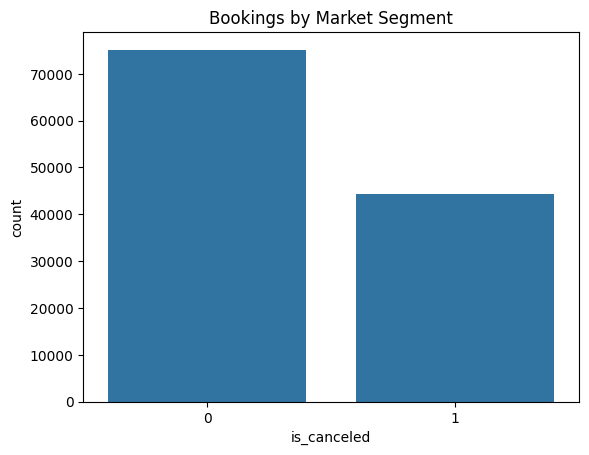

In [212]:
sns.countplot(x='is_canceled', data=df, order=df['is_canceled'].value_counts().index)
plt.title("Bookings by Market Segment")
plt.show()

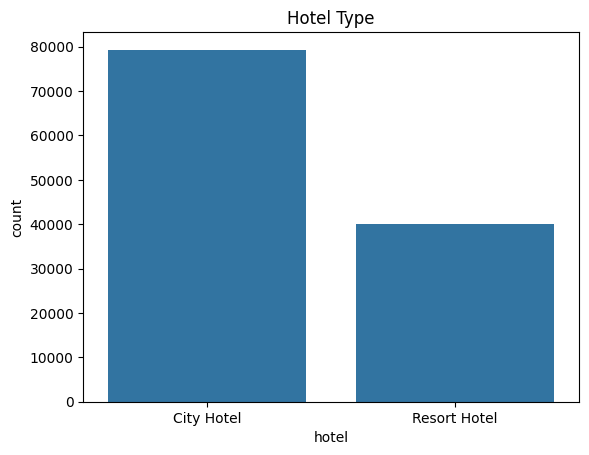

In [213]:
sns.countplot(x='hotel', data=df, order=df['hotel'].value_counts().index)
plt.title("Hotel Type")
plt.show()

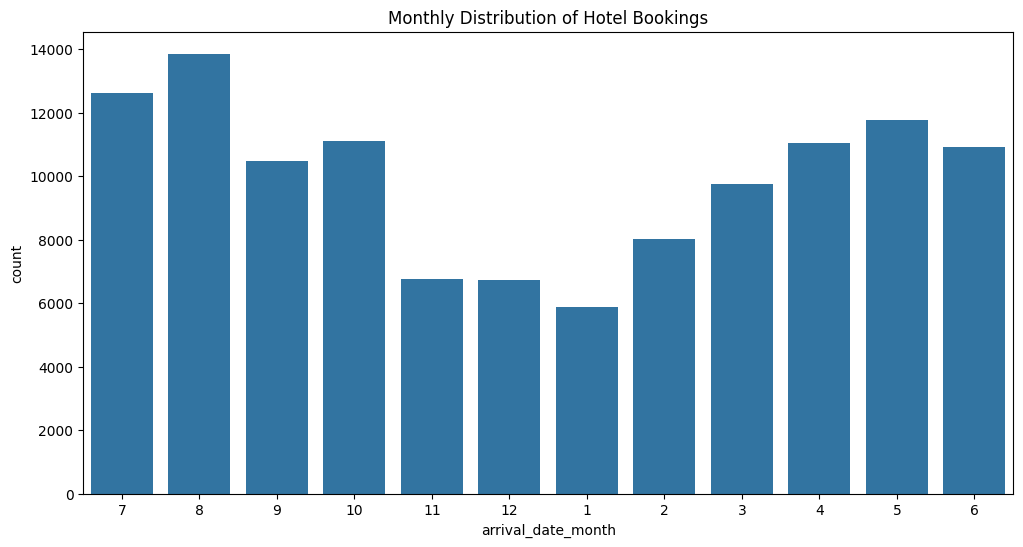

In [214]:
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', data=df2, order=df2['arrival_date_month'])
plt.title("Monthly Distribution of Hotel Bookings")
plt.show()

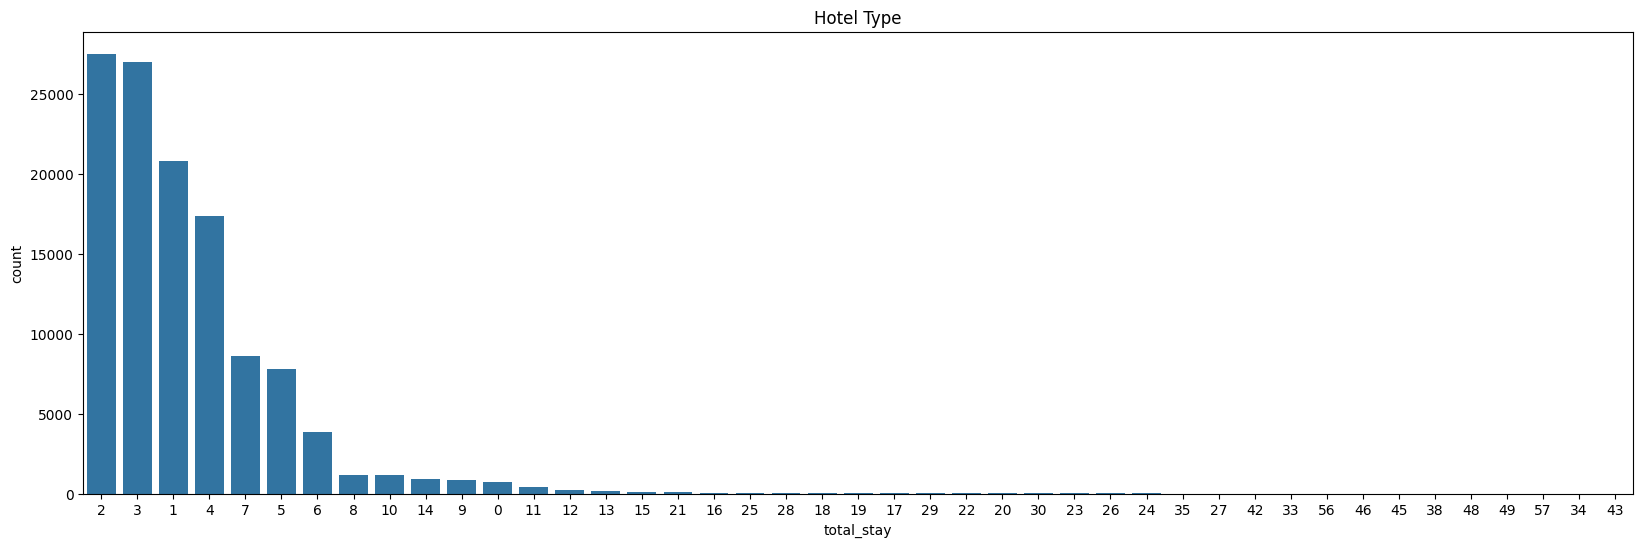

In [215]:
plt.figure(figsize=(20, 6))
sns.countplot(x='total_stay', data=df2, order=df2['total_stay'].value_counts().index)
plt.title("Hotel Type")
plt.show()

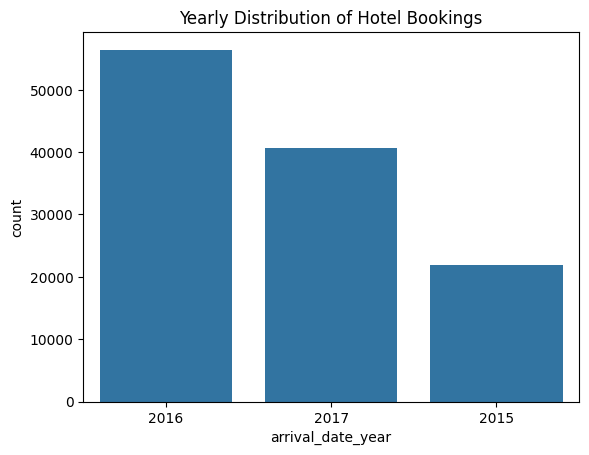

In [216]:
sns.countplot(x='arrival_date_year', data=df2, order=df['arrival_date_year'].value_counts().index)
plt.title("Yearly Distribution of Hotel Bookings")
plt.show()

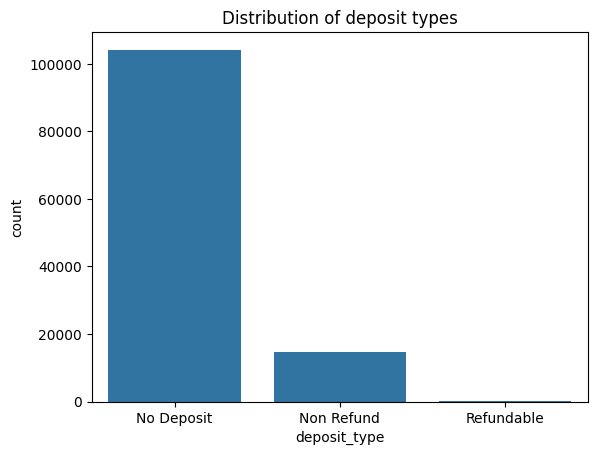

In [217]:
sns.countplot(x='deposit_type', data=df2, order=df2['deposit_type'].value_counts().index)
plt.title("Distribution of deposit types")
plt.show()

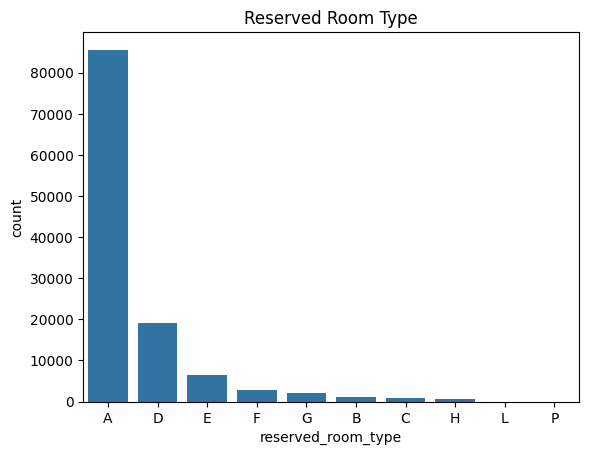

In [218]:
sns.countplot(x='reserved_room_type', data=df2, order=df2['reserved_room_type'].value_counts().index)
plt.title("Reserved Room Type")
plt.show()

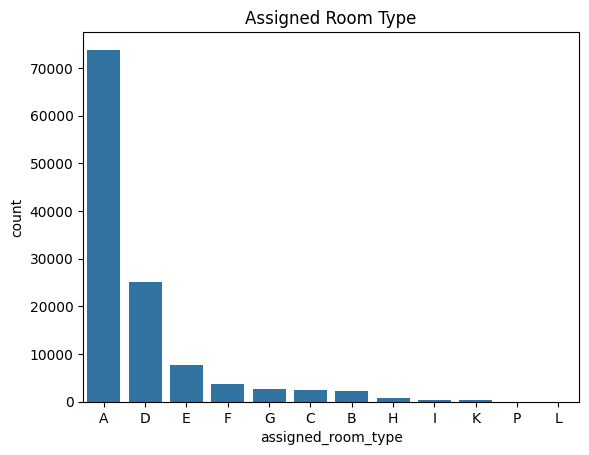

In [219]:
sns.countplot(x='assigned_room_type', data=df2, order=df2['assigned_room_type'].value_counts().index)
plt.title("Assigned Room Type")
plt.show()

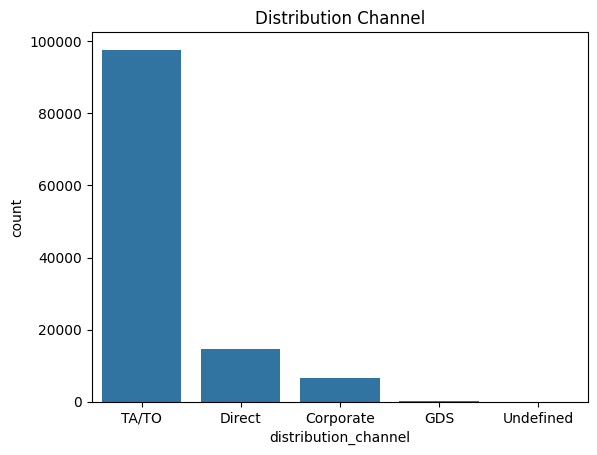

In [220]:
sns.countplot(x='distribution_channel', data=df2, order=df2['distribution_channel'].value_counts().index)
plt.title("Distribution Channel")
plt.show()

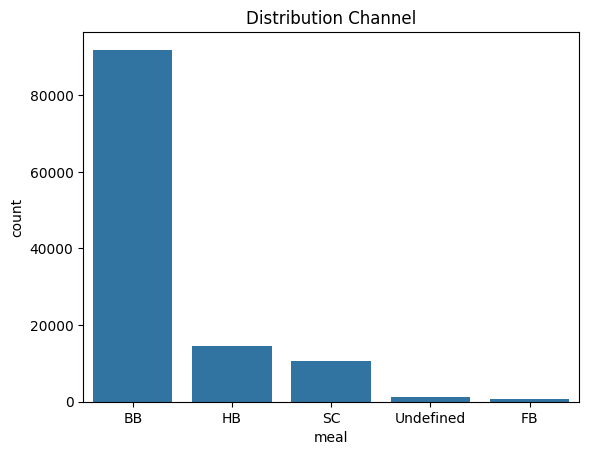

In [221]:
sns.countplot(x='meal', data=df2, order=df2['meal'].value_counts().index)
plt.title("Distribution Channel")
plt.show()

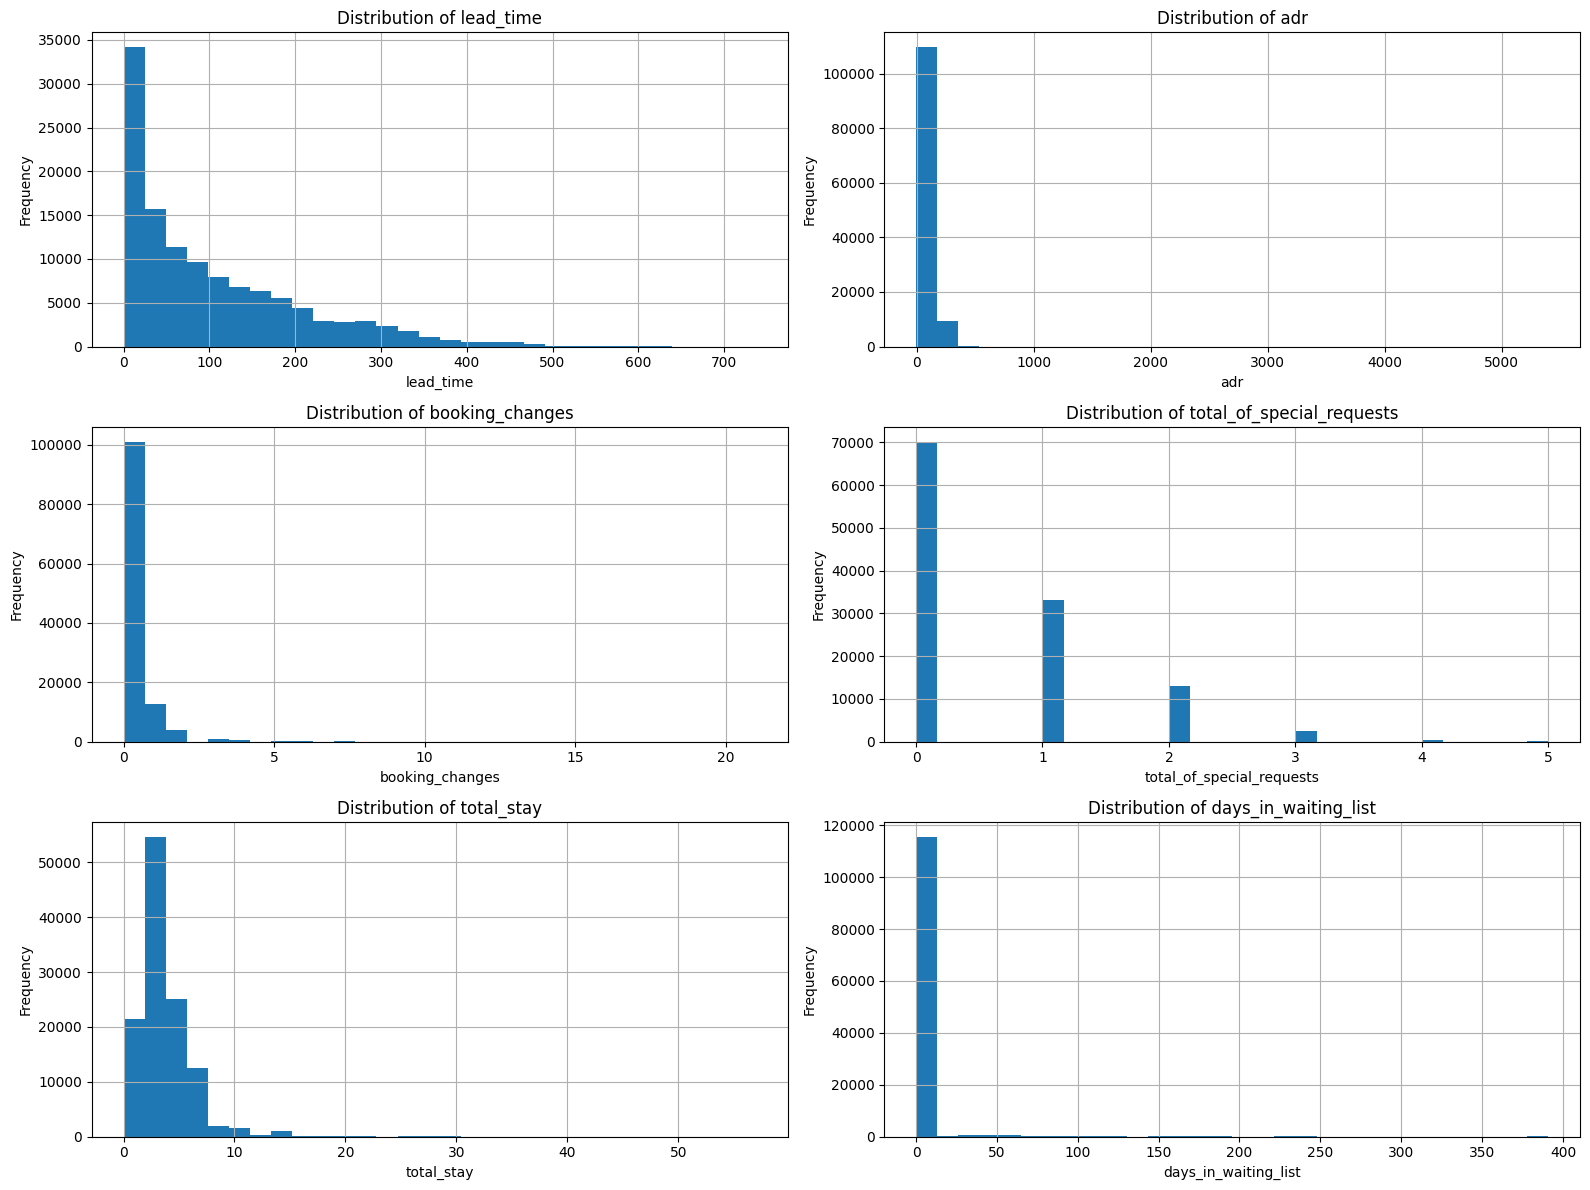

In [222]:
cols = ['lead_time', 'adr', 'booking_changes', 'total_of_special_requests',
        'total_stay', 'days_in_waiting_list']

# Set up the subplot grid
plt.figure(figsize=(16, 12))  # Adjust as needed

for i, col in enumerate(cols):
    plt.subplot(3, 2, i + 1)  # 3 rows x 2 columns grid
    plt.hist(df2[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


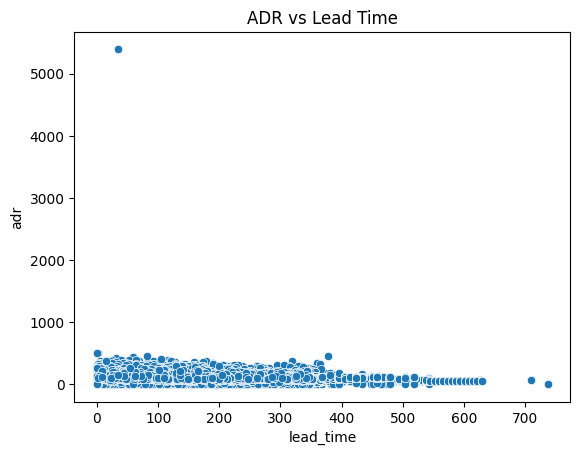

In [223]:
sns.scatterplot(x='lead_time', y='adr', data=df2)
plt.title('ADR vs Lead Time')
plt.show()

Text(0.5, 1.0, 'Lead Time vs ADR by Customer Type')

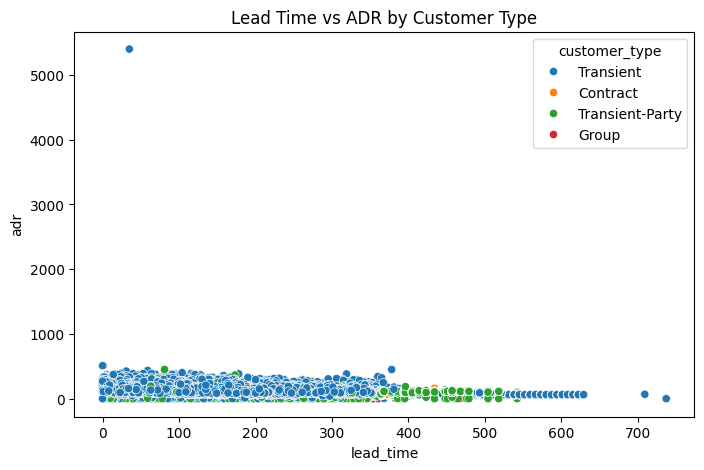

In [224]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df2, x='lead_time', y='adr', hue='customer_type')
plt.title('Lead Time vs ADR by Customer Type')

<Axes: xlabel='market_segment', ylabel='adr'>

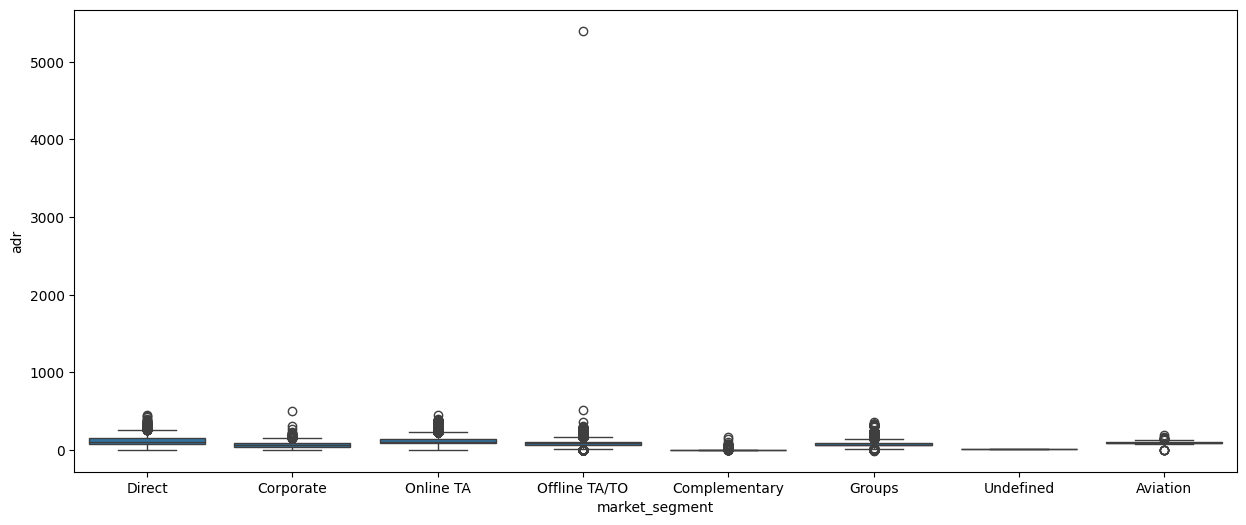

In [225]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df2, x='market_segment', y='adr')

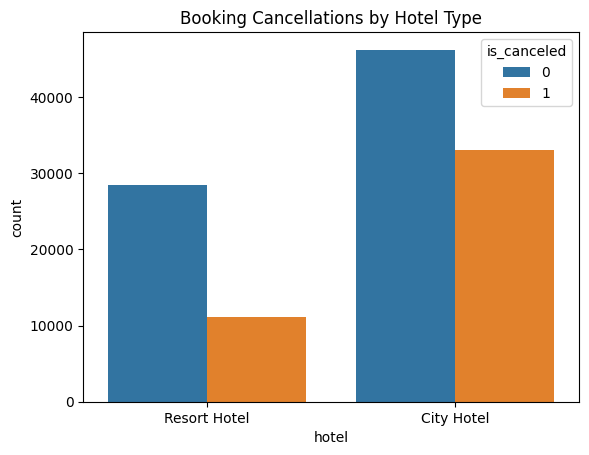

In [226]:
sns.countplot(x='hotel', hue='is_canceled', data=df2)
plt.title('Booking Cancellations by Hotel Type')
plt.show()

Text(0.5, 1.0, 'ADR vs Total Nights (colored by Cancellation)')

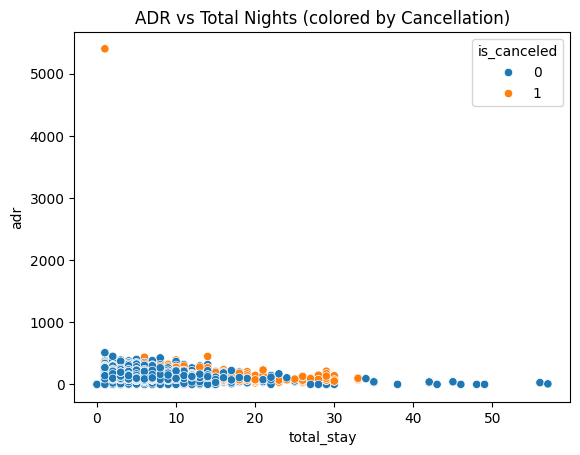

In [227]:
sns.scatterplot(x='total_stay', y='adr', hue='is_canceled', data=df2)
plt.title('ADR vs Total Nights (colored by Cancellation)')

**Time Series Analysis of Booking Trends**

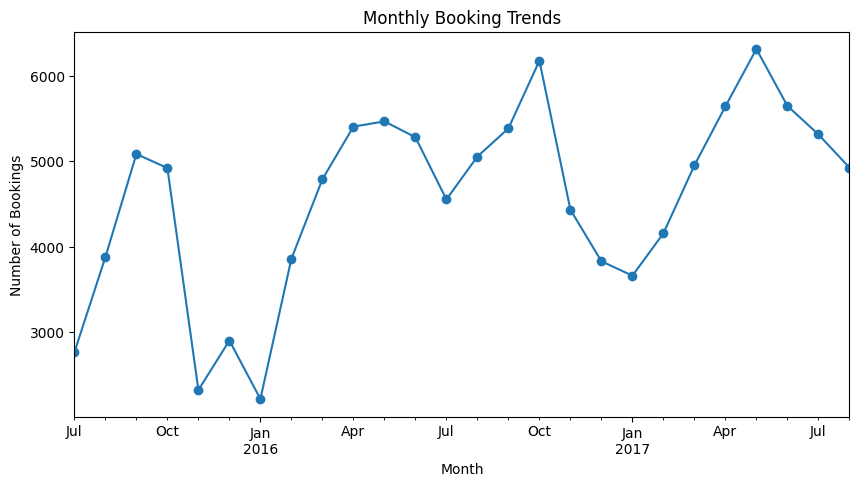

In [228]:
monthly_bookings = df2.groupby(df2['arrival_date'].dt.to_period('M')).size()
monthly_bookings.plot(kind='line', figsize=(10,5), marker='o')
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

Above graph shows us an idea of how bookings vary month-wise

**Guest demographics and distribution by country.**

In [229]:
top_10 = df['country'].value_counts().head(10)
top_10


country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

In [230]:
top_countries=top_10

Text(0, 0.5, 'Number of Bookings')

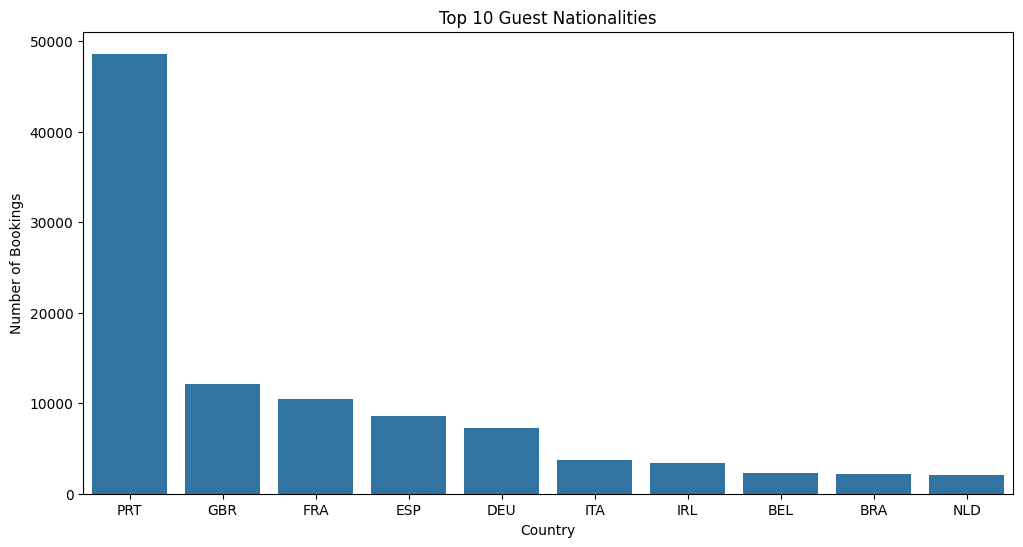

In [231]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Guest Nationalities')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')

 **Market segment share and ADR (Average Daily Rate) comparison.**

In [232]:
market_segment_counts = df2['market_segment'].value_counts()
market_segment_counts

market_segment
Online TA        56403
Offline TA/TO    24160
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Undefined            2
Name: count, dtype: int64

In [233]:
adr_by_segment = df2.groupby('market_segment')['adr'].mean()
adr_by_segment

market_segment
Aviation         100.142110
Complementary      2.921757
Corporate         70.283731
Direct           115.934427
Groups            79.466592
Offline TA/TO     87.432976
Online TA        117.252769
Undefined         15.000000
Name: adr, dtype: float64

<Axes: xlabel='market_segment'>

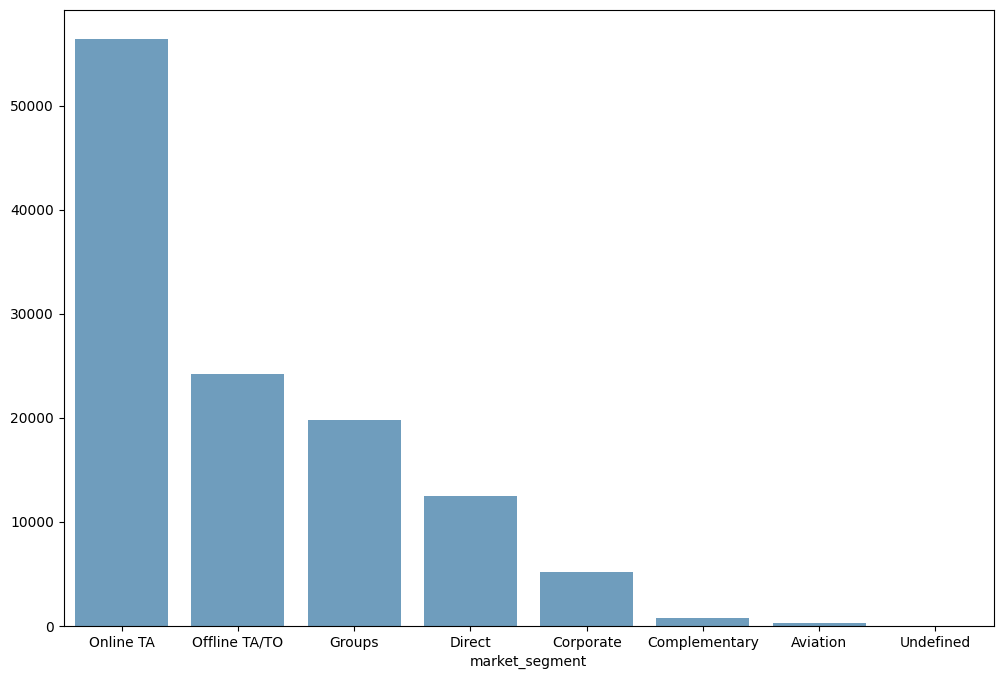

In [234]:
plt.figure(figsize=(12, 8))
sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, alpha=0.7)

**Booking lead time distribution across customer types**


Text(0.5, 1.0, 'Lead Time by Customer Type')

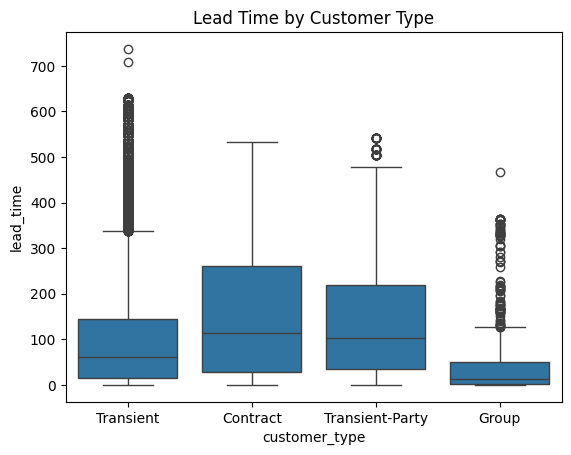

In [235]:
sns.boxplot(x='customer_type', y='lead_time', data=df2)
plt.title("Lead Time by Customer Type")

# 3. Correlation Analysis

In [236]:
numeric_cols = ['lead_time', 'adr', 'booking_changes', 
                'total_of_special_requests', 'days_in_waiting_list', 
               'total_stay']

<Axes: >

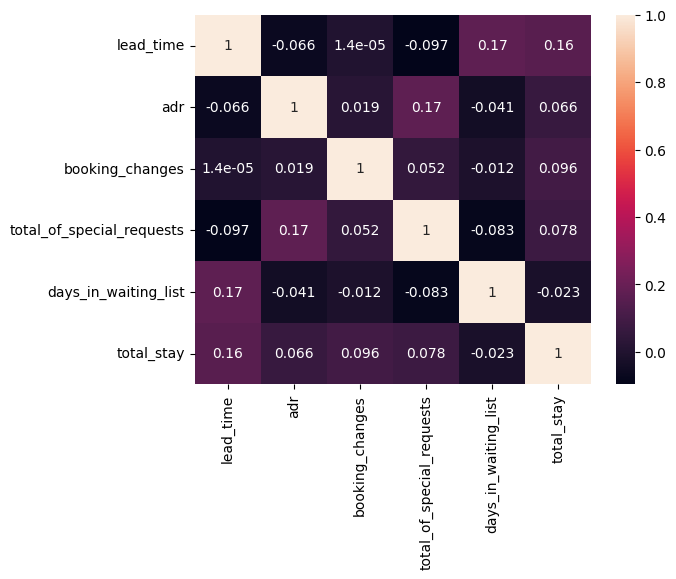

In [237]:
sns.heatmap(df2[numeric_cols].corr(), annot=True)

In [238]:
np.corrcoef(df2['adr'], df2['lead_time'])

array([[ 1.        , -0.06633153],
       [-0.06633153,  1.        ]])

In [239]:
np.corrcoef(df2['adr'], df2['total_of_special_requests'])

array([[1.        , 0.17140409],
       [0.17140409, 1.        ]])

In [240]:
np.corrcoef(df2['adr'], df2['booking_changes'])

array([[1.      , 0.019217],
       [0.019217, 1.      ]])

Correlation analysis shows that ADR is weakly influenced by the number of special requests, while lead time and booking changes have almost negligible impact on ADR. This indicates that price variation may be more influenced by other factors like market segment, room type, or hotel type, and not just booking behavior.

# 4. Hypothesis Testing

#### 1. Ho: No difference in ADR between Online TA and Direct

In [241]:
online_ta_adr = df[df['distribution_channel'] == 'TA/TO']['adr']
direct_adr = df[df['distribution_channel'] == 'Direct']['adr']
ssw.ztest(online_ta_adr, direct_adr, value = 0)

(np.float64(-7.482310991727907), np.float64(7.302688034155966e-14))

pvalue (7.302688034155966e-14) is less than 0.05 

So we rject the Null Hypothesis 

which means ADR influences significantly

#### 2. Ho: Room upgrades are independent of lead time

In [242]:
df2['is_upgraded'] = (df2['reserved_room_type'] != df2['assigned_room_type']).astype(int)
ssw.ztest(df2[df2['is_upgraded'] == 1]['lead_time'], df2[df2['is_upgraded'] == 0]['lead_time'], value = 0)

C:\Users\RDX\AppData\Local\Temp\ipykernel_3024\510619241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['is_upgraded'] = (df2['reserved_room_type'] != df2['assigned_room_type']).astype(int)


(np.float64(-48.582751966258066), np.float64(0.0))

pvalue (0.0) is less than 0.05 

So we reject the Null Hypothesis 

which means Room updrades influences lead time significantly

#### 3. H0: Average stay duration does not differ between customer types

In [243]:
mod1 = ols('total_stay ~ customer_type', data = df2).fit()
tb1 = sm.stats.anova_lm(mod1)
tb1

,df,sum_sq,mean_sq,F,PR(>F)
customer_type,3.0,18149.307592,6049.769197,956.606477,0.0
Residual,118898.0,751934.546742,6.324198,NaN,NaN


pvalue (0.0) is less than 0.05

So we reject the Null Hypothesis

which means Average stay duration influenced by customer types significantly

# Key Business Questions

1. What influences ADR the most?

In [244]:
correlation = df2.corr(numeric_only=True)['adr'].sort_values(ascending=False)
print("Top correlations with ADR:\n", correlation.head(10))

Top correlations with ADR:
 adr                          1.000000
total_revenue                0.566511
total_guests                 0.365903
children                     0.325034
adults                       0.227431
arrival_date_year            0.197919
total_of_special_requests    0.171404
arrival_date_month           0.078780
arrival_date_week_number     0.075256
total_stay                   0.066044
Name: adr, dtype: float64


**As the magnitude of co-relation coefficient of total_revenue vs adr is close to 1, so we can consclude that total_revenue influences adr the most**

2. Do guests who book earlier tend to request more changes?

In [245]:
np.corrcoef(df2['lead_time'], df2['booking_changes'])

array([[1.0000000e+00, 1.4403601e-05],
       [1.4403601e-05, 1.0000000e+00]])

p-value << 0.05 → not statistically significant.

**The correlation is almost zero → practically no relationship.
 p-value < 0.05 → not statistically significant.**

3. Are there pricing or booking differences across countries?

In [246]:
country_stats = df2.groupby('country')[['adr', 'lead_time']].mean()
top_countries = country_stats.sort_values(by='adr', ascending=False).head(15)
top_countries = top_countries.reset_index()
print(top_countries)


   country         adr   lead_time
0      DJI  273.000000    0.000000
1      AIA  265.000000    0.000000
2      AND  202.652857   47.000000
3      UMI  200.000000   11.000000
4      LAO  181.665000    2.500000
5      MYT  177.750000  208.000000
6      NCL  175.500000  116.000000
7      GEO  169.015909   97.681818
8      COM  165.305000   22.500000
9      FRO  155.200000  286.400000
10     PHL  154.355750   58.050000
11     GIB  150.402222  117.277778
12     BGD  149.802500   28.083333
13     SLV  148.850000   49.000000
14     BHR  145.330000  173.800000


**There is significant variation in ADR and lead time across countries. While some small countries show high ADRs (likely due to niche, high-value bookings), a more stable picture can be seen by analyzing top 10 most frequent guest countries.**

4. Is there a pattern in room upgrades or reassignment?

In [247]:
df['is_upgraded'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)

upgrade_counts = df['is_upgraded'].value_counts(normalize=True).rename({0: 'No Upgrade', 1: 'Upgraded'}) * 100
print("Overall Room Assignment Status (%):\n", upgrade_counts)

upgrade_by_room = df.groupby('reserved_room_type')['is_upgraded'].mean().sort_values(ascending=False) * 100
print("\nUpgrade Rate by Reserved Room Type (%):\n", upgrade_by_room)

Overall Room Assignment Status (%):
 is_upgraded
No Upgrade    87.505654
Upgraded      12.494346
Name: proportion, dtype: float64

Upgrade Rate by Reserved Room Type (%):
 reserved_room_type
L    83.333333
A    14.414959
B    11.627907
E     9.364958
D     7.629811
F     6.558509
C     5.257511
H     2.828619
G     2.531041
P     0.000000
Name: is_upgraded, dtype: float64


C:\Users\RDX\AppData\Local\Temp\ipykernel_3024\4215925816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['is_upgraded'] = (df2['reserved_room_type'] != df2['assigned_room_type']).astype(int)


Text(0.5, 1.0, 'Upgrade Rate by Reserved Room Type (%)')

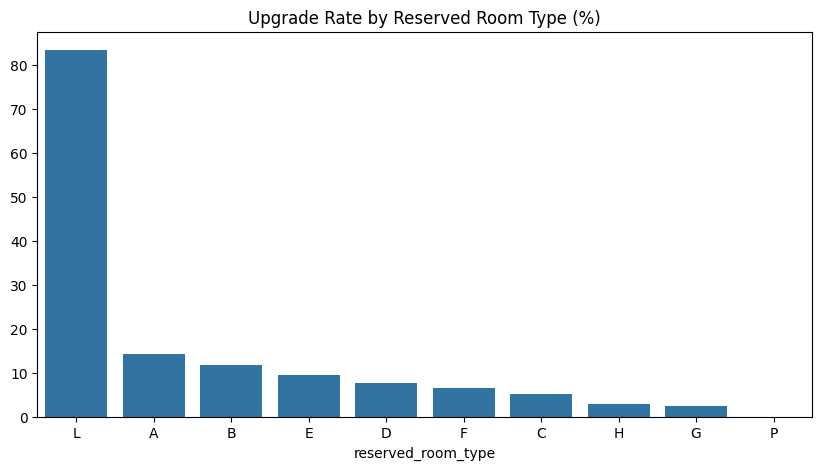

In [248]:
df2['is_upgraded'] = (df2['reserved_room_type'] != df2['assigned_room_type']).astype(int)
upgrade_by_room = df2.groupby('reserved_room_type')['is_upgraded'].mean().sort_values(ascending=False) * 100
plt.figure(figsize=(10, 5))
sns.barplot(x=upgrade_by_room.index, y=upgrade_by_room.values)
plt.title("Upgrade Rate by Reserved Room Type (%)")

5. Are reserved room types consistently matched with assigned room types?

In [249]:
# Match rate calculation

df['room_matched'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)
match_counts = df['room_matched'].value_counts(normalize=True).rename({1: 'Matched', 0: 'Mismatched'}) * 100
print("Room Match Status (%):\n", match_counts)

# Mismatch count by reserved room type

mismatch_by_room = df[df['room_matched'] == 0].groupby('reserved_room_type')['room_matched'].count().sort_values(ascending=False)
print("\nRoom Type-wise Mismatched Bookings:\n", mismatch_by_room)


Room Match Status (%):
 room_matched
Matched       87.505654
Mismatched    12.494346
Name: proportion, dtype: float64

Room Type-wise Mismatched Bookings:
 reserved_room_type
A    12396
D     1465
E      612
F      190
B      130
G       53
C       49
H       17
L        5
Name: room_matched, dtype: int64


**Around 12.5% of bookings experience a room reassignment. Most mismatches originate from Room Type A, which is probably the default or base-level option.**

6. What are the most common guest demographics (e.g., group size, nationality)?

In [250]:
group_size_counts = df2['total_guests'].value_counts().sort_index()
top_nationalities = df2['country'].value_counts().head(10)
top_nationalities, group_size_counts.head(10)

(country
 PRT    48590
 GBR    12129
 FRA    10415
 ESP     8568
 DEU     7287
 ITA     3766
 IRL     3375
 BEL     2342
 BRA     2224
 NLD     2104
 Name: count, dtype: int64,
 total_guests
 0.0       170
 1.0     22289
 2.0     81880
 3.0     10479
 4.0      3926
 5.0       137
 6.0         1
 10.0        2
 12.0        2
 20.0        2
 Name: count, dtype: int64)

 **Majority of guests are from European countries, especially Portugal (likely due to hotel location).**

7. Do guest types influence booking behavior?

In [251]:
df2['is_canceled'] = df2['is_canceled'].astype(int)
customer_stats = df2.groupby('customer_type')[['adr', 'lead_time', 'is_canceled']].mean()
customer_counts = df2['customer_type'].value_counts()
customer_stats['booking_count'] = customer_counts
customer_stats = customer_stats.sort_values(by='adr', ascending=False).reset_index()
customer_stats

C:\Users\RDX\AppData\Local\Temp\ipykernel_3024\602520337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['is_canceled'] = df2['is_canceled'].astype(int)


,customer_type,adr,lead_time,is_canceled,booking_count
0,Transient,107.245498,93.631574,0.408864,89174
1,Contract,87.549637,142.969823,0.309617,4076
2,Transient-Party,86.111330,137.087274,0.254246,25082
3,Group,84.023351,55.724561,0.101754,570


**Transient guests drive the highest revenue but also carry the highest cancellation risk. In contrast, group and contract bookings are more stable but offer lower ADR. This suggests a tradeoff between profitability and booking consistency.**

8. How does lead time vary by customer type and country?

Text(0.5, 0, 'Customer Type')

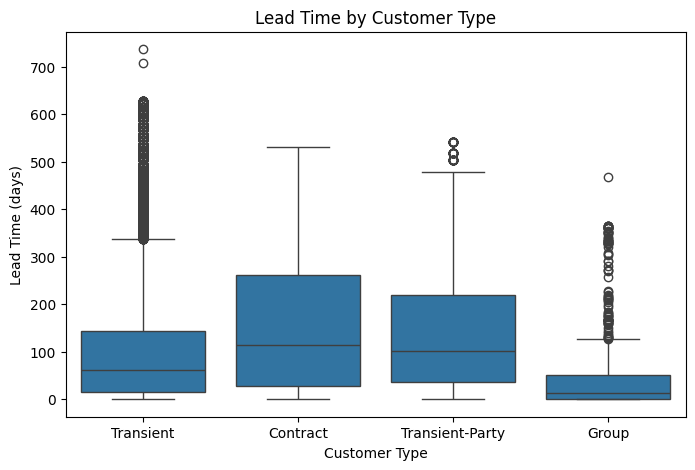

In [252]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='customer_type', y='lead_time', data=df2)
plt.title("Lead Time by Customer Type")
plt.ylabel("Lead Time (days)")
plt.xlabel("Customer Type")

Text(0.5, 1.0, 'Lead Time by Top 5 Guest Countries')

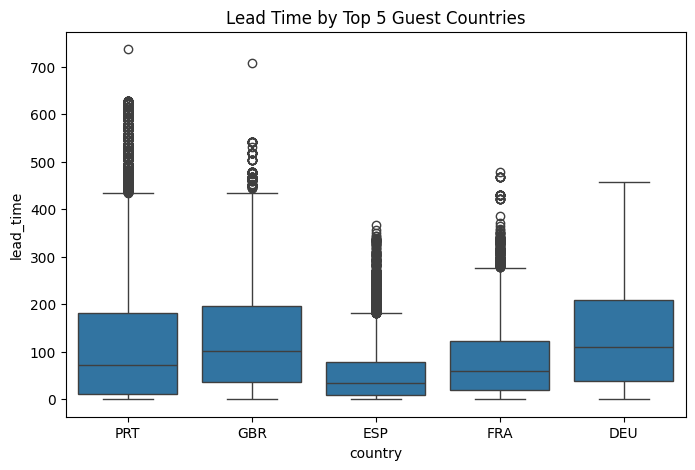

In [253]:
top_countries = df2['country'].value_counts().head(5).index
df_top_countries = df2[df2['country'].isin(top_countries)]
plt.figure(figsize=(8, 5))
sns.boxplot(x='country', y='lead_time', data=df_top_countries)
plt.title("Lead Time by Top 5 Guest Countries")

**Transient guests are the most unpredictable, while Contract bookings are more long-term.**

**Portugal (PRT) and UK (GBR) show relatively low median lead times — guests often book closer to arrival.**

**France (FRA), Spain (ESP), and  Germany (DEU) show slightly longer lead times.**

**Domestic or nearby countries (like Portugal) book later, while international guests plan further ahead.**



9. Are longer lead times associated with fewer changes or cancellations?

Text(0.5, 1.0, 'Lead Time vs Booking Changes')

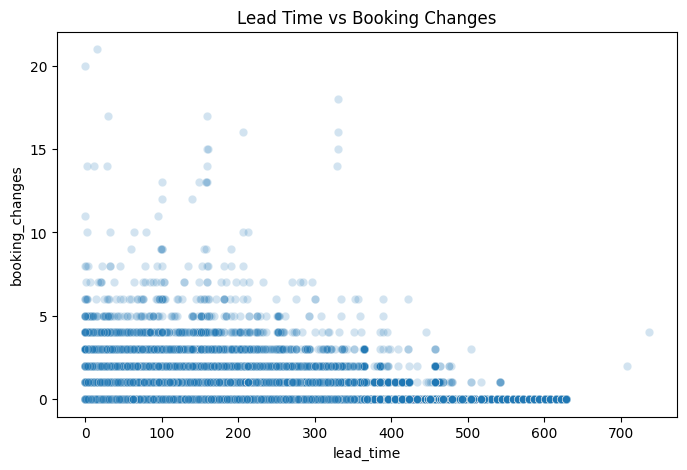

In [254]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='lead_time', y='booking_changes', data=df2, alpha=0.2)
plt.title("Lead Time vs Booking Changes")

C:\Users\RDX\AppData\Local\Temp\ipykernel_3024\41357642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='lead_time', data=df2, palette='pastel')


Text(0, 0.5, 'Lead Time (days)')

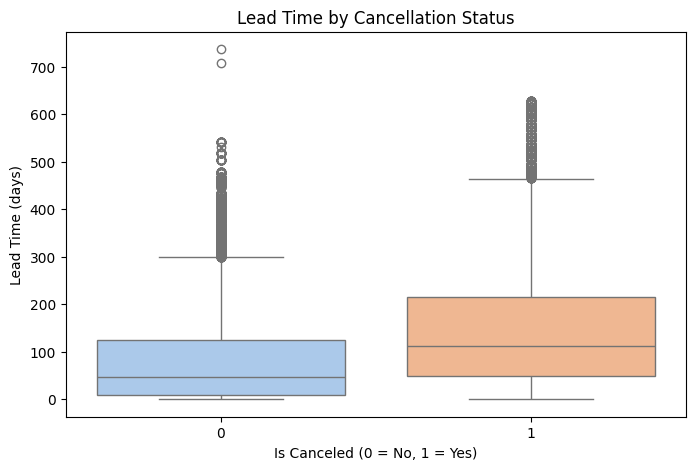

In [255]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_canceled', y='lead_time', data=df2, palette='pastel')
plt.title("Lead Time by Cancellation Status")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Lead Time (days)")

 **Long lead time is weakly linked to higher cancellation rates, but has no real effect on how often bookings are modified. Hotels might consider flexible pricing or policies for long-lead bookings to reduce cancellations.**

10. What is the typical duration of stay, and how does it vary by customer type or segment?


In [256]:
stay_by_customer_type = df2.groupby('customer_type')['total_stay'].mean().sort_values(ascending=False)
stay_by_market_segment = df2.groupby('market_segment')['total_stay'].mean().sort_values(ascending=False)
stay_by_customer_type, stay_by_market_segment

(customer_type
 Contract           5.320658
 Transient          3.451544
 Transient-Party    3.063193
 Group              2.894737
 Name: total_stay, dtype: float64,
 market_segment
 Offline TA/TO    3.903767
 Aviation         3.607595
 Online TA        3.575359
 Direct           3.199855
 Groups           2.992628
 Corporate        2.112307
 Complementary    1.660763
 Undefined        1.500000
 Name: total_stay, dtype: float64)

**Customers with corporate contracts or those using travel agencies typically stay longer. In contrast, corporate bookings are short-stay, high-frequency, and complementary guests (free stays) tend to have the shortest stays.**

11. How often are guests upgraded or reassigned to a different room type?


In [257]:

upgrade_distribution = df2['is_upgraded'].value_counts(normalize=True).rename({0: 'No Upgrade', 1: 'Upgraded'}) * 100
upgrade_distribution

is_upgraded
No Upgrade    87.637718
Upgraded      12.362282
Name: proportion, dtype: float64

**Room upgrades or reassignments happen in ~12.5% of cases — likely due to overbooking, room availability, or guest satisfaction strategies.**

12. Are guests who make special requests more likely to experience booking changes or longer stays?

Text(0.5, 1.0, 'Booking Changes vs Number of Special Requests')

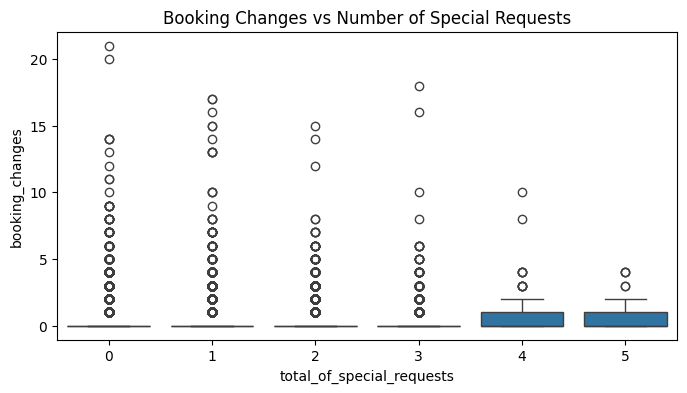

In [258]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='total_of_special_requests', y='booking_changes', data=df2)
plt.title("Booking Changes vs Number of Special Requests")

In [259]:
np.corrcoef(df2.total_of_special_requests, df2.booking_changes), np.corrcoef(df2.total_of_special_requests, df2.total_stay)

(array([[1.       , 0.0524228],
        [0.0524228, 1.       ]]),
 array([[1.        , 0.07790804],
        [0.07790804, 1.        ]]))

**Both correlations are positive but weak.**
**Guests who make more special requests tend to stay slightly longer and make marginally more booking changes**


13. Do certain market segments or distribution channels show higher booking consistency or revenue?


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Groups'),
  Text(5, 0, 'Offline TA/TO'),
  Text(6, 0, 'Online TA'),
  Text(7, 0, 'Undefined')])

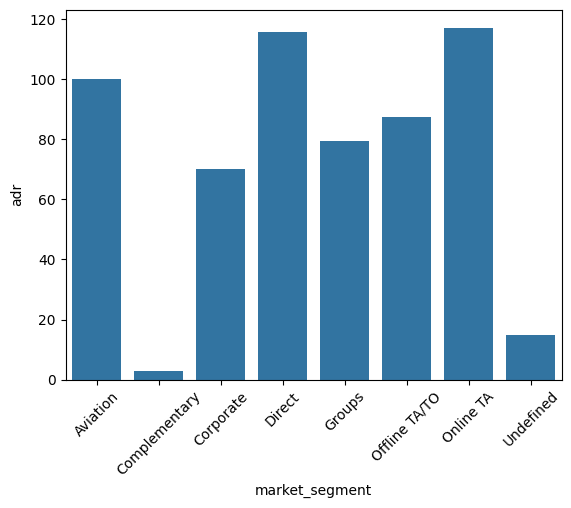

In [260]:
segment_stats = df2.groupby('market_segment')[['adr', 'is_canceled']].mean()
channel_stats = df2.groupby('distribution_channel')[['adr', 'is_canceled']].mean()
sns.barplot(x=segment_stats.index, y=segment_stats['adr']);  
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Groups'),
  Text(5, 0, 'Offline TA/TO'),
  Text(6, 0, 'Online TA'),
  Text(7, 0, 'Undefined')])

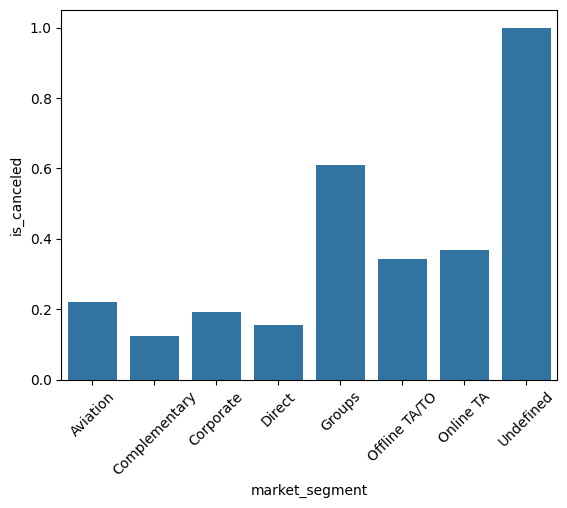

In [261]:
sns.barplot(x=segment_stats.index, y=segment_stats['is_canceled']);
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Corporate'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'GDS'),
  Text(3, 0, 'TA/TO'),
  Text(4, 0, 'Undefined')])

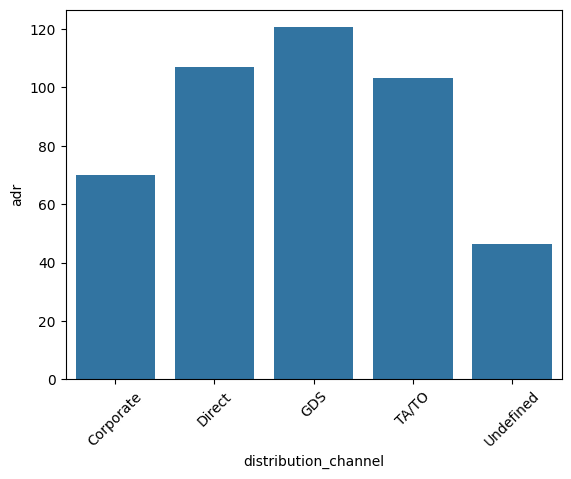

In [262]:
sns.barplot(x=channel_stats.index, y=channel_stats['adr']); 
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Corporate'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'GDS'),
  Text(3, 0, 'TA/TO'),
  Text(4, 0, 'Undefined')])

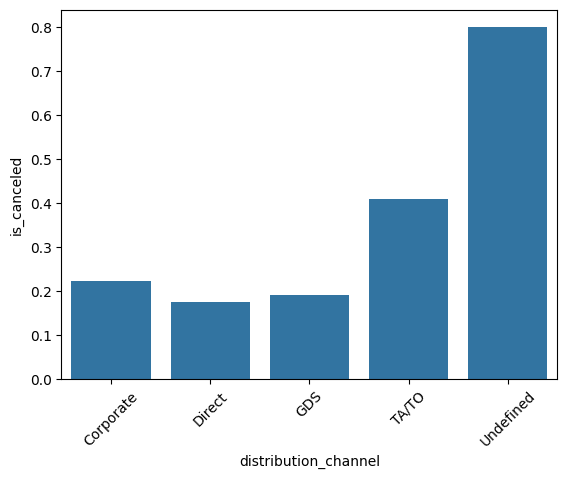

In [263]:
sns.barplot(x=channel_stats.index, y=channel_stats['is_canceled']);  
plt.xticks(rotation=45)

Online TA gives highest ADR but higher risk of cancellations.  
Direct bookings offer high ADR and low cancellation — most reliable.  
Group bookings cancel often — need caution when forecasting.    
GDS & Direct are high-value channels with acceptable cancellation rates.  
TA/TO has high revenue but high volatility.

14. What factors are most strongly associated with higher ADR?


In [264]:
correlation = df.corr(numeric_only=True)['adr'].sort_values(ascending=False)
print("Top correlations with ADR:\n", correlation.head(10))

Top correlations with ADR:
 adr                            1.000000
children                       0.324854
adults                         0.230641
arrival_date_year              0.197580
total_of_special_requests      0.172185
room_matched                   0.138133
arrival_date_week_number       0.075791
stays_in_week_nights           0.065237
required_car_parking_spaces    0.056628
stays_in_weekend_nights        0.049342
Name: adr, dtype: float64


As the magnitude of co-relation coefficient of total_revenue vs adr is close to 1, so we can consclude that total_revenue influences adr the most

15. Are there customer types or segments consistently contributing to higher revenue?


In [265]:
revenue_by_customer = df2.groupby('customer_type')['total_revenue'].mean().sort_values(ascending=False)
revenue_by_customer

customer_type
Contract           451.196700
Transient          382.503005
Transient-Party    260.442157
Group              245.612439
Name: total_revenue, dtype: float64

In [266]:
revenue_by_segment = df2.groupby('market_segment')['total_revenue'].mean().sort_values(ascending=False)
revenue_by_segment

market_segment
Online TA        424.141389
Direct           404.654284
Aviation         368.971983
Offline TA/TO    336.801500
Groups           235.696594
Corporate        149.190796
Undefined         24.000000
Complementary      6.924414
Name: total_revenue, dtype: float64

Contract and Transient customers contribute the highest per-booking revenue. Transient bookings offer both volume and value.

Online TA and Direct channels bring in the highest revenue. Complimentary bookings contribute nearly zero.

16. Do bookings with more lead time or from specific countries yield higher ADR?


In [267]:
df2['lead_time_bucket'] = pd.cut(df2['lead_time'], bins=[0, 30, 90, 180, 365, df2['lead_time'].max()],
                                labels=['0–30d', '31–90d', '91–180d', '181–365d', '365+d'])
adr_by_lead_time = df2.groupby('lead_time_bucket')['adr'].mean()
adr_by_lead_time

C:\Users\RDX\AppData\Local\Temp\ipykernel_3024\1227859413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['lead_time_bucket'] = pd.cut(df2['lead_time'], bins=[0, 30, 90, 180, 365, df2['lead_time'].max()],
C:\Users\RDX\AppData\Local\Temp\ipykernel_3024\1227859413.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adr_by_lead_time = df2.groupby('lead_time_bucket')['adr'].mean()


lead_time_bucket
0–30d       102.320922
31–90d      106.579838
91–180d     109.103358
181–365d     95.109302
365+d        78.811569
Name: adr, dtype: float64

In [268]:
top_countries = df2['country'].value_counts().head(5).index
adr_by_country = df2[df2['country'].isin(top_countries)].groupby('country')['adr'].mean()
adr_by_country

country
DEU    104.396756
ESP    116.995463
FRA    109.617276
GBR     96.022058
PRT     92.041483
Name: adr, dtype: float64

Bookings made 1–6 months in advance have the highest ADR. Very early bookings (1+ year) tend to be cheaper — likely discounted group/contract rates.

International guests (ESP, FRA) tend to pay more than local (PRT). Portugal may get discounts due to domestic proximity.

17. Are guests with higher ADR more likely to request special services or make booking modifications?


In [269]:
np.corrcoef(df.adr, df.total_of_special_requests), np.corrcoef(df.adr, df.booking_changes)

(array([[1.        , 0.17218526],
        [0.17218526, 1.        ]]),
 array([[1.        , 0.01961767],
        [0.01961767, 1.        ]]))

Guests who pay higher tend to make more special requests, but not more booking changes.

18. Do guests from different countries behave differently in terms of booking timing or stay length?



In [270]:
country_behavior = df2.groupby('country')[['lead_time', 'total_stay']].mean().sort_values(by='lead_time', ascending=False)
country_behavior.head(10)

,lead_time,total_stay
country,,
FJI,322.000000,3.000000
FRO,286.400000,12.000000
BEN,274.000000,2.333333
LCA,268.000000,5.000000
KNA,251.500000,2.000000
MYT,208.000000,3.500000
MKD,198.200000,3.700000
BRB,192.000000,2.000000
DOM,185.285714,4.214286


In [271]:
country_behavior = df2.groupby('country')[['lead_time', 'total_stay']].mean().sort_values(by='total_stay', ascending=False)
country_behavior.head(10) 

,lead_time,total_stay
country,,
FRO,286.400000,12.000000
SEN,55.727273,8.818182
AGO,23.096685,8.116022
TGO,62.000000,8.000000
GNB,40.888889,7.111111
BHS,159.000000,7.000000
PLW,169.000000,7.000000
SLE,84.000000,7.000000
RWA,102.000000,6.500000


Countries like PRT (Portugal) might show shorter lead times, suggesting local or last-minute bookings.

Guests from countries farther away (like USA, BRA, GBR) may have longer lead times due to international travel planning.

19. Are guests who make booking changes more likely to request additional services or cancel?


In [272]:
import scipy.stats as stats
contingency = pd.crosstab(df['booking_changes'] > 0, df['is_canceled'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
chi2, p


(np.float64(4169.746849050339), np.float64(0.0))

Ho: Guests who make booking changes are not more likely to cancel

As p 0 < 0.05, we reject H0, Guests who make booking changes are more likely to request services or cancel.

In [273]:
import scipy.stats as stats
contingency = pd.crosstab(df['booking_changes'] > 0, df['total_of_special_requests'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
chi2, p

(np.float64(311.0949136567454), np.float64(4.120380110344912e-65))

Ho: Guests who make booking changes are likely to request additional services

As p 0 < 0.05, we reject H0 ⇒ Guests who make booking changes are likely to request additional services.